In [1]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
pd.pandas.set_option('display.max_columns',None)
import seaborn as sns
from pandas_datareader.data import DataReader
import seaborn as sns

C:\Users\HI\AppData\Roaming\Python\Python38\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
stock = '^GSPC'
start = '2000-01-01'
df = pdr.DataReader(stock,data_source = 'yahoo',start= start)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,1472.420044,1458.189941,1464.469971,1469.250000,374050000,1469.250000
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-12,4134.729980,4056.879883,4130.549805,4063.040039,3735080000,4063.040039
2021-05-13,4131.580078,4074.989990,4074.989990,4112.500000,3687780000,4112.500000
2021-05-14,4183.129883,4129.580078,4129.580078,4173.850098,3251920000,4173.850098
2021-05-17,4171.919922,4142.689941,4169.919922,4163.290039,3307130000,4163.290039
2021-05-18,4169.149902,4125.990234,4165.939941,4127.830078,3559790000,4127.830078


<AxesSubplot:title={'center':'Closing Prices(Monthwise)'}, xlabel='Date'>

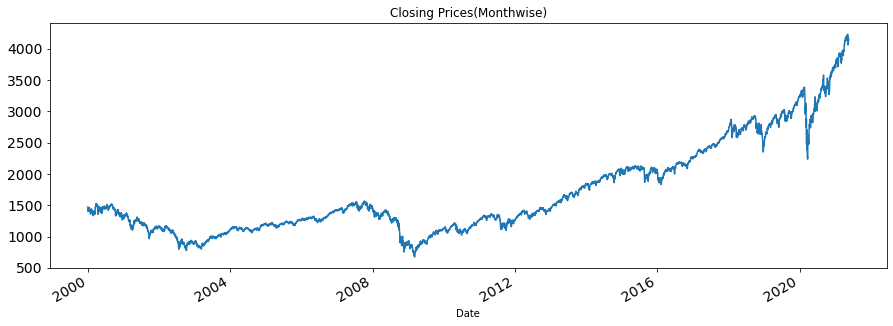

In [5]:
temp=df.groupby(['Date'])['Close'].mean() 
temp.plot(figsize=(15,5), title= 'Closing Prices(Monthwise)', fontsize=14)

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range = (0,1))
dt = sc.fit_transform(np.array(df['Close']).reshape(-1,1))

In [8]:
#training data and trainig data

In [9]:
training_data = int(len(dt)*0.80)
test_data = len(dt)- training_data
train_data,test_data = dt[0:training_data,:], dt[training_data:len(dt),:1]

In [10]:
train_data

array([[0.22292023],
       [0.21897486],
       [0.2032834 ],
       ...,
       [0.45580932],
       [0.45444268],
       [0.45458892]])

In [11]:
test_data

array([[0.455036  ],
       [0.45874802],
       [0.46106236],
       ...,
       [0.98347895],
       [0.98050937],
       [0.9705377 ]])

In [12]:
train_data.shape,test_data.shape

((4303, 1), (1076, 1))

In [13]:
def traintest(df,timestep):
    datax, datay= [],[]
    for i in range(len(df) - timestep - 1):
        a = df[i:(i+timestep),0]
        datax.append(a)
        datay.append(df[i+timestep ,0])
    return np.array(datax), np.array(datay)


In [14]:
timestep = 500
x_train,y_train =  traintest(train_data, timestep)
x_test , y_test = traintest(test_data,timestep)

In [15]:
x_train.shape,y_train.shape

((3802, 500), (3802,))

In [16]:
x_test.shape , y_test.shape

((575, 500), (575,))

In [17]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test  = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from keras import optimizers
from keras.layers.core import Activation


In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(500, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(25,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 500, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 500, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 52,101
Trainable params: 52,101
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test), batch_size = 63, epochs = 10, verbose = 1)

Epoch 1/10
61/61 [==============================] - 42s 682ms/step - loss: 0.0035 - accuracy: 2.6302e-04 - val_loss: 0.0019 - val_accuracy: 0.0017
Epoch 2/10
61/61 [==============================] - 36s 597ms/step - loss: 1.2458e-04 - accuracy: 2.6302e-04 - val_loss: 0.0021 - val_accuracy: 0.0017
Epoch 3/10
61/61 [==============================] - 36s 598ms/step - loss: 1.2034e-04 - accuracy: 2.6302e-04 - val_loss: 0.0022 - val_accuracy: 0.0017
Epoch 4/10
61/61 [==============================] - 36s 594ms/step - loss: 1.1482e-04 - accuracy: 2.6302e-04 - val_loss: 0.0026 - val_accuracy: 0.0017
Epoch 5/10
61/61 [==============================] - 36s 595ms/step - loss: 1.1468e-04 - accuracy: 2.6302e-04 - val_loss: 0.0021 - val_accuracy: 0.0017
Epoch 6/10
61/61 [==============================] - 36s 587ms/step - loss: 1.0842e-04 - accuracy: 2.6302e-04 - val_loss: 0.0016 - val_accuracy: 0.0017
Epoch 7/10
61/61 [==============================] - 36s 584ms/step - loss: 1.0260e-04 - accuracy: 

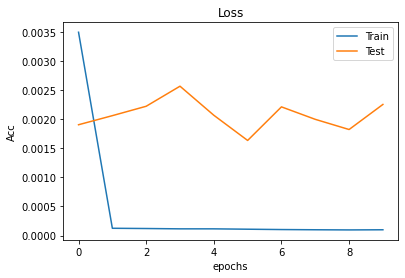

In [22]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [23]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [24]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)
predictions

array([[2625.8374],
       [2633.8044],
       [2641.9258],
       [2649.7725],
       [2657.076 ],
       [2663.6724],
       [2669.837 ],
       [2675.7603],
       [2681.428 ],
       [2687.1228],
       [2692.958 ],
       [2698.9717],
       [2704.991 ],
       [2711.049 ],
       [2717.1133],
       [2723.0715],
       [2728.7896],
       [2734.0674],
       [2738.9885],
       [2743.4468],
       [2747.354 ],
       [2750.4785],
       [2752.5042],
       [2753.2915],
       [2753.308 ],
       [2752.9473],
       [2752.679 ],
       [2752.7231],
       [2753.327 ],
       [2754.667 ],
       [2756.744 ],
       [2759.3706],
       [2762.6943],
       [2766.0793],
       [2769.1487],
       [2771.8955],
       [2774.158 ],
       [2775.991 ],
       [2777.6416],
       [2779.588 ],
       [2782.0254],
       [2785.0603],
       [2788.7192],
       [2793.0527],
       [2797.9954],
       [2803.2039],
       [2808.522 ],
       [2813.781 ],
       [2819.039 ],
       [2824.2336],


In [25]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

119/119 [==============================] - 14s 122ms/step - loss: 8.5747e-05 - accuracy: 2.6302e-04
Accuracy of the model on Training Data is -  0.026301946491003036 %
18/18 [==============================] - 2s 121ms/step - loss: 0.0023 - accuracy: 0.0017
Accuracy of the model on Testing Data is -  0.17391304718330503 %


In [ ]:
#mse and #rmse

In [43]:
import math
from sklearn.metrics import mean_squared_error

In [42]:
print("Mean_sraured_error:" ,mean_squared_error(y_train,train_predict))
print("Root_Mean_sraured_error:" ,np.sqrt(mean_squared_error(y_train,train_predict)))

Mean_sraured_error: 8.57471615688138e-05
Root_Mean_sraured_error: 0.009259976326579556


In [39]:
print("Mean_sraured_error:" ,mean_squared_error(y_test,test_predict))
print("Root_Mean_sraured_error:" ,np.sqrt(mean_squared_error(y_test,test_predict)))

Mean_sraured_error: 0.0022586349373612076
Root_Mean_sraured_error: 0.04752509797318894


In [41]:
print("Mean_sraured_error:" ,mean_squared_error(y_train,train_predict))
print("Root_Mean_sraured_error:" ,np.sqrt(mean_squared_error(y_test,test_predict)))

Mean_sraured_error: 8.57471615688138e-05
Root_Mean_sraured_error: 0.04752509797318894


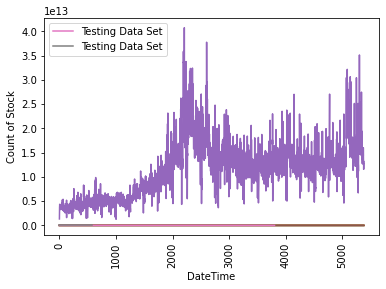

In [84]:
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot= test_predict
# plot baseline and predictions
plt.plot(sc.inverse_transform(df))
plt.plot(trainPredictPlot,  label="Testing Data Set")
plt.plot(testPredictPlot, label="Testing Data Set")
plt.ylabel("Count of Stock")
plt.xlabel("DateTime")
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [26]:
# adding Dropout layer

In [26]:
model1 = Sequential()
model1.add(LSTM(50, return_sequences = True,input_shape= (500,1)))
model1.add(Dropout(0.3))
model1.add(LSTM(50,return_sequences = True))
model1.add(Dropout(0.3))
model1.add(LSTM(50))
model1.add(Dense(25, activation = 'relu', kernel_initializer = 'he_uniform'))
model1.add(Dense(1, activation = 'linear'))
model1.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 500, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 500, 50)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 500, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [32]:
history1 = model1.fit(x_train,y_train,validation_data = (x_test,y_test), batch_size = 15, epochs = 10, verbose = 1)

Epoch 1/10
254/254 [==============================] - 89s 349ms/step - loss: 1.1913e-04 - accuracy: 2.6302e-04 - val_loss: 0.0062 - val_accuracy: 0.0017
Epoch 2/10
254/254 [==============================] - 94s 371ms/step - loss: 1.0852e-04 - accuracy: 2.6302e-04 - val_loss: 0.0043 - val_accuracy: 0.0017
Epoch 3/10
254/254 [==============================] - 101s 396ms/step - loss: 1.1234e-04 - accuracy: 2.6302e-04 - val_loss: 0.0055 - val_accuracy: 0.0017
Epoch 4/10
254/254 [==============================] - 97s 380ms/step - loss: 9.6805e-05 - accuracy: 2.6302e-04 - val_loss: 0.0035 - val_accuracy: 0.0017
Epoch 5/10
254/254 [==============================] - 98s 385ms/step - loss: 1.2126e-04 - accuracy: 2.6302e-04 - val_loss: 0.0089 - val_accuracy: 0.0017
Epoch 6/10
254/254 [==============================] - 93s 367ms/step - loss: 1.0326e-04 - accuracy: 2.6302e-04 - val_loss: 0.0054 - val_accuracy: 0.0017
Epoch 7/10
254/254 [==============================] - 93s 364ms/step - loss: 1.05

In [33]:
print("Accuracy of Training_data is:", model1.evaluate(x_train,y_train)[1]*100,"%")
print("Accuracy of Test_data is:", model1.evaluate(x_test,y_test)[1]*100,"%")

119/119 [==============================] - 14s 121ms/step - loss: 9.0488e-05 - accuracy: 2.6302e-04
Accuracy of Training_data is: 0.026301946491003036 %
18/18 [==============================] - 2s 110ms/step - loss: 0.0114 - accuracy: 0.0017
Accuracy of Test_data is: 0.17391304718330503 %


In [47]:
predictionss = model.predict(x_test)
predictionss = sc.inverse_transform(predictions)
predictionss

array([[ 9338338.],
       [ 9366669.],
       [ 9395550.],
       [ 9423453.],
       [ 9449424.],
       [ 9472882.],
       [ 9494803.],
       [ 9515867.],
       [ 9536022.],
       [ 9556273.],
       [ 9577024.],
       [ 9598409.],
       [ 9619814.],
       [ 9641357.],
       [ 9662922.],
       [ 9684109.],
       [ 9704443.],
       [ 9723211.],
       [ 9740711.],
       [ 9756565.],
       [ 9770460.],
       [ 9781571.],
       [ 9788774.],
       [ 9791574.],
       [ 9791633.],
       [ 9790350.],
       [ 9789396.],
       [ 9789553.],
       [ 9791700.],
       [ 9796465.],
       [ 9803851.],
       [ 9813192.],
       [ 9825011.],
       [ 9837048.],
       [ 9847963.],
       [ 9857731.],
       [ 9865776.],
       [ 9872295.],
       [ 9878164.],
       [ 9885086.],
       [ 9893754.],
       [ 9904546.],
       [ 9917557.],
       [ 9932968.],
       [ 9950544.],
       [ 9969066.],
       [ 9987977.],
       [10006679.],
       [10025377.],
       [10043849.],


In [53]:
train_predictt=model1.predict(x_train)
test_predictt=model1.predict(x_test)

In [59]:
train_predictt.shape

(3802, 1)

In [64]:
test_predictt.shape

(575, 1)

In [55]:
print("Mean_sraured_error:" ,mean_squared_error(y_train,train_predictt))
print("Root_Mean_sraured_error:" ,np.sqrt(mean_squared_error(y_train,train_predictt)))

Mean_sraured_error: 9.048831962467438e-05
Root_Mean_sraured_error: 0.009512534868512933


In [56]:
print("Mean_sraured_error:" ,mean_squared_error(y_test,test_predictt))
print("Root_Mean_sraured_error:" ,np.sqrt(mean_squared_error(y_test,test_predictt)))

Mean_sraured_error: 0.011368192076319771
Root_Mean_sraured_error: 0.10662172422316088


In [57]:
print("Mean_sraured_error:" ,mean_squared_error(y_train,train_predictt))
print("Root_Mean_sraured_error:" ,np.sqrt(mean_squared_error(y_test,test_predictt)))

Mean_sraured_error: 9.048831962467438e-05
Root_Mean_sraured_error: 0.10662172422316088


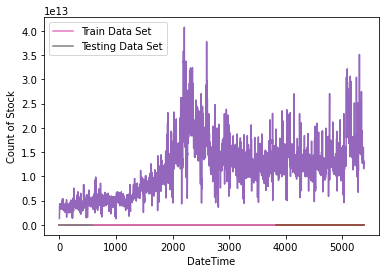

In [116]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(df)

trainPredictPlot = train_predictt
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)

testPredictPlot= test_predictt
# plot baseline and predictions
plt.plot(sc.inverse_transform(df))
plt.plot(trainPredictPlot, label="Train Data Set")
plt.plot(testPredictPlot, label="Testing Data Set")
plt.ylabel("Count of Stock")
plt.xlabel("DateTime")
plt.legend()
plt.show()


In [121]:
!pip install streamlit

In [123]:
streamlit__version__

NameError: name 'streamlit' is not defined